<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#補間法" data-toc-modified-id="補間法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>補間法</a></span><ul class="toc-item"><li><span><a href="#ラグランジュ補間" data-toc-modified-id="ラグランジュ補間-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ラグランジュ補間</a></span></li><li><span><a href="#逆行列から" data-toc-modified-id="逆行列から-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>逆行列から</a></span></li></ul></li><li><span><a href="#対数関数のニュートンの差分商補間(2014期末試験，25点)" data-toc-modified-id="対数関数のニュートンの差分商補間(2014期末試験，25点)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>対数関数のニュートンの差分商補間(2014期末試験，25点)</a></span><ul class="toc-item"><li><span><a href="#差分商補間の表中の開いている箇所[-XXX-]を埋めよ．" data-toc-modified-id="差分商補間の表中の開いている箇所[-XXX-]を埋めよ．-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>差分商補間の表中の開いている箇所[ XXX ]を埋めよ．</a></span></li><li><span><a href="#ニュートンの二次多項式" data-toc-modified-id="ニュートンの二次多項式-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ニュートンの二次多項式</a></span></li><li><span><a href="#ニュートンの三次多項式の値を求めよ．" data-toc-modified-id="ニュートンの三次多項式の値を求めよ．-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ニュートンの三次多項式の値を求めよ．</a></span></li><li><span><a href="#補足" data-toc-modified-id="補足-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>補足</a></span></li></ul></li><li><span><a href="#数値積分(I)" data-toc-modified-id="数値積分(I)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数値積分(I)</a></span></li></ul></div>

##  補間法
次の4点
```maple
x y 
0 1 
1 2
2 3
3 1
```
を通る多項式を(a)ラグランジュ補間, (b) 逆行列で求めよ．

### ラグランジュ補間

/Users/bob/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


      3       2
-0.5 x + 1.5 x + 2.776e-16 x + 1


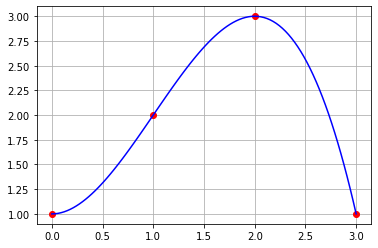

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# もとの点
x = np.array([0,1,2,3])
y = np.array([1,2,3,1])
for i in range(0,4):
    plt.plot(x[i],y[i],'o',color='r')


# Lagrange補間
f = interpolate.lagrange(x,y)
print(f)
x = np.linspace(0,3, 100)
y = f(x)
plt.plot(x, y, color = 'b')

plt.grid()
plt.show()

### 逆行列から

In [2]:
from pprint import pprint

x = np.array([0,1,2,3])
y = np.array([1,2,3,1])
n = 4
A = np.zeros((n,n))
b = np.zeros(n)
for i in range(0,n):
    for j in range(0,n):
        A[i,j] += x[i]**j
    b[i] = y[i]
pprint(A)
pprint(b)

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])
array([1., 2., 3., 1.])


In [3]:
import scipy.linalg as linalg   # SciPy Linear Algebra Library

inv_A = linalg.inv(A)
pprint(inv_A)
np.dot(inv_A,b)

array([[ 1.        , -0.        ,  0.        ,  0.        ],
       [-1.83333333,  3.        , -1.5       ,  0.33333333],
       [ 1.        , -2.5       ,  2.        , -0.5       ],
       [-0.16666667,  0.5       , -0.5       ,  0.16666667]])


array([ 1.00000000e+00,  2.22044605e-16,  1.50000000e+00, -5.00000000e-01])

## 対数関数のニュートンの差分商補間(2014期末試験，25点) 

2を底とする対数関数(Mapleでは$\log[2](x)$)の$F(9.2)=2.219203$をニュートンの差分商補間を用いて求める．ニュートンの内挿公式は，

$$
\begin{array}{rc}
F (x )&=F (x _{0})+
(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+
(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor + \\
& \cdots +  \prod_{i=0}^{n-1} (x-x_i) \, 
f_n \lfloor x_0,x_1,\cdots,x_n \rfloor
\end{array}
$$
である．ここで$f_i \lfloor\, \rfloor$ は次のような関数を意味していて，
$$
\begin{array}{rc}
f _{1}\lfloor x_0,x_1\rfloor &=&  \frac{y_1-y_0}{x_1-x_0} \\
f _{2}\lfloor x_0,x_1,x_2\rfloor &=&  \frac{f _{1}\lfloor x_1,x_2\rfloor-
f _{1}\lfloor x_0,x_1\rfloor}{x_2-x_0} \\
\vdots & \\
f _{n}\lfloor x_0,x_1,\cdots,x_n\rfloor &=&  \frac{f_{n-1}\lfloor x_1,x_2\cdots,x_{n}\rfloor-
f _{n-1}\lfloor x_0,x_1,\cdots,x_{n-1}\rfloor}{x_n-x_0} 
\end{array}
$$
差分商と呼ばれる．$x_k=8.0,9.0,10.0,11.0$をそれぞれ選ぶと，差分商補間のそれぞれの項は以下の通りとなる．

$$
\begin{array}{ccl|lll}
\hline
k  &  x_k & y_k=F_0( x_k) &f_1\lfloor x_k,x_{k+1}\rfloor & f_2\lfloor x_k,x_{k+1},x_{k+2}\rfloor &  f_3\lfloor x_k,x_{k+1},x_{k+2},x_{k+3}\rfloor \\
\hline
0  &   8.0  &  2.079442  &          &              &\\
&      &     &     0.117783     &              &\\ 
1  &   9.0  &  2.197225  &           &       [ XXX ]      &\\
&      &     &     0.105360     &              & 0.0003955000 \\
2  &  10.0  &  2.302585  &           &       -0.0050250      &\\ 
&      &     &     0.095310    &              &\\ 
3  &  11.0  &  2.397895 &           &              &\\ 
\hline
\end{array}
$$
それぞれの項は，例えば，

$$
f_2\lfloor x_1,x_2,x_3 \rfloor =\frac{0.095310-0.105360}{11.0-9.0}=-0.0050250
$$
で求められる．ニュートンの差分商の一次多項式の値はx=9.2で

$$
F(x)=F_0(8.0)+(x-x_0)f_1\lfloor x_0,x_1\rfloor =2.079442+0.117783(9.2-8.0)=2.220782
$$
となる．

###  差分商補間の表中の開いている箇所[ XXX ]を埋めよ．
###  ニュートンの二次多項式

$$
F (x )=F (x _{0})+(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor
$$
の値を求めよ．
###  ニュートンの三次多項式の値を求めよ．
ただし，ここでは有効数字7桁程度はとるように．(E.クライツィグ著「数値解析」(培風館,2003), p.31, 例4改)

In [4]:
np.log(9.2)

2.2192034840549946

In [5]:
x_3 = 11
x_1 = 9
f1_23 = 0.095310
f1_12 = 0.105360
f2_123 = (f1_23-f1_12)/(x_3-x_1)
print(f2_123)
f1_01 = 0.117783
x_0 = 8
x_2 = 10
f2_012 = (f1_12-f1_01)/(x_2-x_0)
print((0.105360-0.117783)/(10-8))

-0.005024999999999995
-0.006211500000000002


In [6]:
x = 9.2
F_0 = 2.079442
F_0 + (x-x_0)*(f1_01)+(x-x_0)*(x-x_1)*f2_012

2.2192908399999998

In [7]:
f3_0123 = 0.0003955000
F_0 + (x-x_0)*(f1_01)+(x-x_0)*(x-x_1)*f2_012+(x-x_0)*(x-x_1)*(x-x_2)*f3_0123

2.2192149039999998

### 補足

テキストに紹介したコードによって求められるNewton差分商補間の様子を以下に示しておく．

In [8]:
# https://stackoverflow.com/questions/14823891/newton-s-interpolating-polynomial-python
# by Khalil Al Hooti (stackoverflow)


def _poly_newton_coefficient(x,y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1 # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -x_data[n-k])*p
    return p

[ 4.  -6.   3.4]


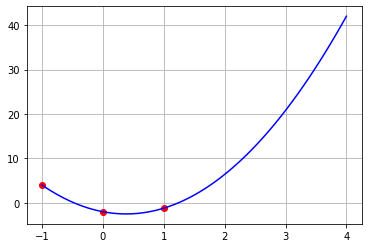

In [9]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = [-1, 0, 1]
y = [4., -2., -1.2]

for i in range(0,3):
    plt.plot(x[i],y[i],'o',color='r')


print(_poly_newton_coefficient(x,y))

xx = np.linspace(-1,4, 100)
yy = newton_polynomial(x, y, xx)
plt.plot(xx, yy, color = 'b')

plt.grid()
plt.show()

[ 4.  -6.   3.4]


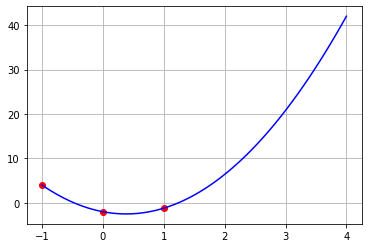

In [10]:
x = [-1, 0, 1]
y = [4., -2., -1.2]

for i in range(0,3):
    plt.plot(x[i],y[i],'o',color='r')


print(_poly_newton_coefficient(x,y))

xx = np.linspace(-1,4, 100)
yy = newton_polynomial(x, y, xx)
plt.plot(xx, yy, color = 'b')

plt.grid()
plt.show()

## 数値積分(I)
次の関数

$$
f(x) = \frac{4}{1+x^2}
$$
を$x = 0..1$で数値積分する．
1.  $N$を2,4,8,…256ととり，$N$個の等間隔な区間にわけて中点法で求めよ．(15)
1.  小数点以下10桁まで求めた値3.141592654との差をdXとする．dXと分割数Nとを両対数プロット(loglogplot)して比較せよ(10)
(2008年度期末試験）

In [11]:
import numpy as np

def func(x):
    return 4.0/(1.0+x**2)

def mid(N):
    x0, xn = 0.0, 1.0

    h = (xn-x0)/N
    S = 0.0
    for i in range(0, N):
        xi = x0 + (i+0.5)*h
        dS = h * func(xi)
        S = S + dS
    return S

def trape(N):
    x0, xn = 0.0, 1.0

    h = (xn-x0)/N
    S = func(x0)/2.0
    for i in range(1, N):
        xi = x0 + i*h
        dS = func(xi)
        S = S + dS
    S = S + func(xn)/2.0
    return h*S

x, y = [], []
for i in range(1,8):
    x.append(2**i)
    y.append(abs(mid(2**i)-np.pi))

x2, y2 = [], []
for i in range(1,8):
    x2.append(2**i)
    y2.append(abs(trape(2**i)-np.pi))


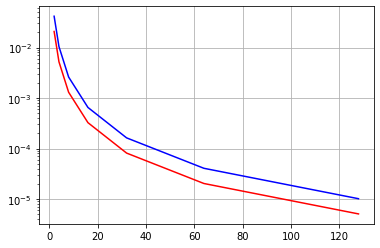

In [12]:
import matplotlib.pyplot as plt

plt.plot(x, y, color = 'r')
plt.plot(x2, y2, color = 'b')
plt.yscale('log')
plt.grid()
plt.show()

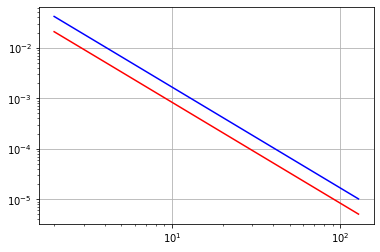

In [13]:
plt.plot(x, y, color = 'r')
plt.plot(x2, y2, color = 'b')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

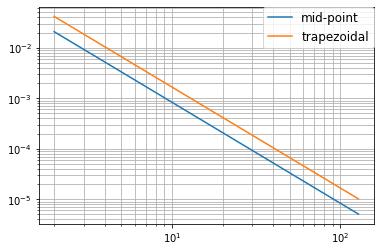

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(x,y, label="mid-point")
plt.plot(x2,y2, label="trapezoidal")
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid(which="both")
plt.legend(borderaxespad=0, fontsize=12)
plt.show()